---
# Ziel


Erstellen eines Neuronalen Netzes mit dem gezeichnete Dreiecke, Vierecke und Kreise erkannt werden. 

---

# 1. Allgemeine Vorbereitung

Navigieren in den KI-Ordner

In [3]:
%cd ~/../content/drive/My\ Drive/KI-Workshop/


/content/drive/My Drive/KI-Workshop


Importieren der benötigten Module mit folgenden Funktionen: 


* keras: Funktionen für das Neuronale Netz

* numpy: Zur numerischen Berechnung von Arrays

* matplotlib: Zum Anzeigen von Bildern und Plotten von Funktionen

* sys: Erlaubt den Zugriff vom Python-Interpreter auf alle Verzeichnisse 

* modules: Verzeichnis mit Funktionen speziell für dieses Skript 


In [4]:

import keras
from keras.callbacks import ModelCheckpoint 
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib
from matplotlib import pyplot as plt
import numpy as np


# 2. Vorbereitung der Bilder

In [6]:
# Welche Seitenlänge sollen die Bilder haben?
image_size = 28 

# Wie viele Klassen haben wir? 
num_classes = 3

In [ ]:
# Herunterladen der Bilder aus dem Github-Verzeichnis
!git clone https://github.com/FeliziaTUDo/Formen.git

In [ ]:
# Variablen für die Pfade zu den Tainings- und Testbildern
path_train_images = './Formen/train'
path_test_images = './Formen/test'

In [8]:


# Einlesen der Bilder in ein Trainings- und ein Validationdatenset
## Vorbearbeitung der Bilder
data_generation = ImageDataGenerator(rescale = 1./ 255,
                                     vertical_flip = True,
                                     horizontal_flip = True, 
                                     validation_split=0.2)


## Trainingsdatenset
train_images = data_generation.flow_from_directory( path_train_images,
                                                    target_size = (image_size,image_size),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'grayscale',
                                                    seed = 100,
                                                    subset='training'
                                                    )

## Validationdatenset
validation_generator = data_generation.flow_from_directory(path_train_images,
                                                    target_size=(image_size,image_size),
                                                    batch_size = 32,
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    seed = 100,
                                                    subset='validation')

Found 1344 images belonging to 3 classes.
Found 336 images belonging to 3 classes.


# 3. Aufbau des Neuronalen Netzes

In [22]:
# Schritt 1: Initialisierung des Neuronalen Netzes
model = Sequential()

model.add(Flatten(input_shape=(image_size,image_size, 1)))
# Schritt 2: Aufbau des Neuronalen Netzes
## Die Eingabeschicht besteht aus 28 * 28 = 784 Neuronen, festgelegt mit: input_shape=(image_size*image_size,)
## Die mittlere Schicht (Hidden Layer) besteht aus 32 Neuronen, festgelegt mit units=32
neurons_second_layer = 10 # 38 #28 * 3 #19 war mit 0.62 am besten, 7 auch fast
model.add(Dense(units=neurons_second_layer, activation='relu'))

## Die Ausgabeschicht besteht aus 3 Neuronen, festgelegt mit units = num_classes (num_classes wurde im 2. Schritt zu 3 festgesetzt)
model.add(Dense(units=num_classes, activation='softmax'))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 7,883
Trainable params: 7,883
Non-trainable params: 0
_________________________________________________________________


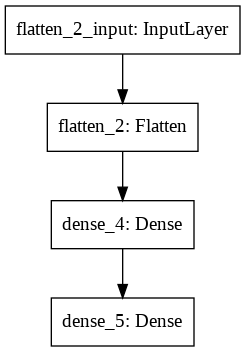

In [23]:
## Ausgabe der Netzarchitektur  
model.summary()
## Speichern des Aufbaus als Grafik: 
plot_model(model, 'Architektur_Neuronales_Netz2.png')

In [26]:
# Schritt 3: Kompilieren des Neuronalen Netzes
my_optimizer = Adam(lr = 0.01) 
model.compile(optimizer = my_optimizer,
                   loss = 'categorical_crossentropy',
                   metrics = 'accuracy')   

## Vorgabe zum Speichern des Netzes
checkpoint_path = "Checkpoint_NeuronalesNetz.ckpt"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose = 1,
    mode='max',
    save_best_only=True)               

# 4. Training des Neuronalen Netzes

In [27]:
# Schritt 4: Training des Neuronalen Netzes
history = model.fit(train_images,
                    epochs = 100,
                    validation_data=validation_generator,
                    callbacks = model_checkpoint_callback
                    )                    



Epoch 1/100
41/42 [============================>.] - ETA: 0s - loss: 1.0967 - accuracy: 0.3354
Epoch 00001: val_accuracy improved from -inf to 0.35119, saving model to Checkpoint_NeuronalesNetz.ckpt
42/42 [==============================] - 2s 43ms/step - loss: 1.0967 - accuracy: 0.3326 - val_loss: 1.0957 - val_accuracy: 0.3512
Epoch 2/100
41/42 [============================>.] - ETA: 0s - loss: 1.0957 - accuracy: 0.3415
Epoch 00002: val_accuracy did not improve from 0.35119
42/42 [==============================] - 2s 40ms/step - loss: 1.0963 - accuracy: 0.3400 - val_loss: 1.0958 - val_accuracy: 0.3512
Epoch 3/100
41/42 [============================>.] - ETA: 0s - loss: 1.0966 - accuracy: 0.3338
Epoch 00003: val_accuracy did not improve from 0.35119
42/42 [==============================] - 2s 40ms/step - loss: 1.0962 - accuracy: 0.3348 - val_loss: 1.0957 - val_accuracy: 0.3512
Epoch 4/100
41/42 [============================>.] - ETA: 0s - loss: 1.0971 - accuracy: 0.3384
Epoch 00004: val

KeyboardInterrupt: ignored

# 5. Treffen von Vorhersagen

Found 30 images belonging to 3 classes.
[0.09637634 0.05063435 0.8529893 ]
Dreieck
(28, 28, 1)


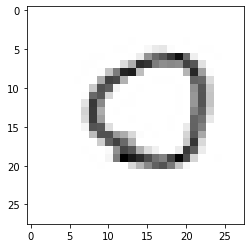

[0.65809655 0.23580353 0.10609999]
Kreis
(28, 28, 1)


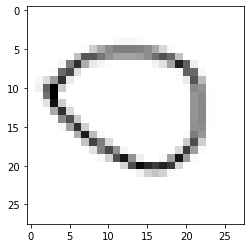

[0.69009066 0.2926734  0.01723595]
Kreis
(28, 28, 1)


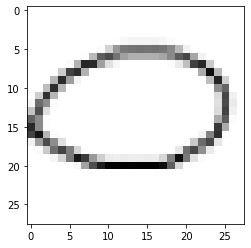

[0.17322153 0.5434263  0.28335226]
Viereck
(28, 28, 1)


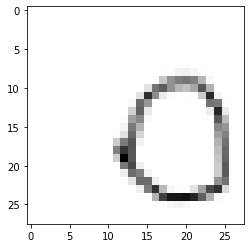

[0.2095371  0.49625775 0.2942052 ]
Viereck
(28, 28, 1)


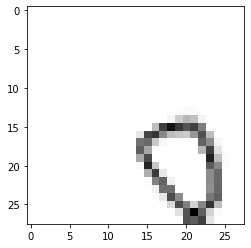

[0.36191207 0.5339095  0.10417838]
Viereck
(28, 28, 1)


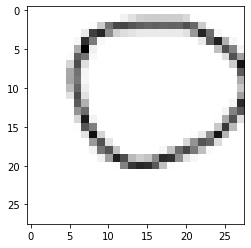

[0.17317882 0.4200206  0.40680057]
Viereck
(28, 28, 1)


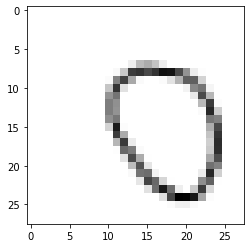

[0.21592122 0.11910855 0.6649702 ]
Dreieck
(28, 28, 1)


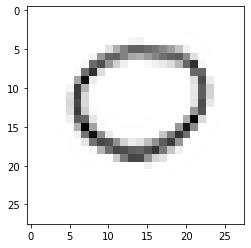

[0.22544682 0.66581225 0.1087409 ]
Viereck
(28, 28, 1)


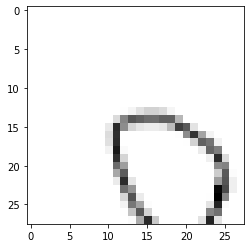

[0.14887024 0.30011913 0.5510106 ]
Dreieck
(28, 28, 1)


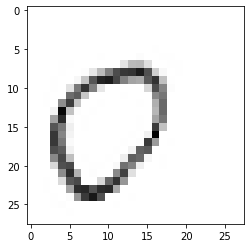

[0.518521   0.07989322 0.40158573]
Kreis
(28, 28, 1)


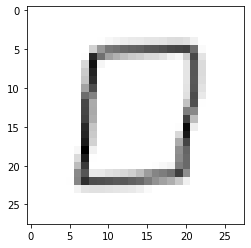

[0.29927236 0.6020318  0.09869576]
Viereck
(28, 28, 1)


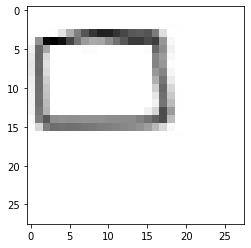

[0.18573092 0.37057814 0.443691  ]
Dreieck
(28, 28, 1)


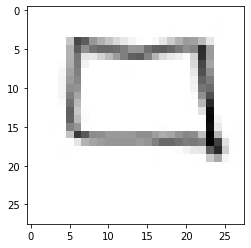

[0.14677685 0.6583131  0.19491006]
Viereck
(28, 28, 1)


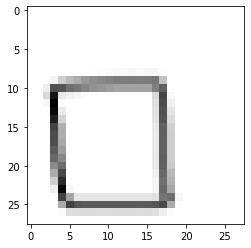

[0.21608078 0.40266898 0.38125023]
Viereck
(28, 28, 1)


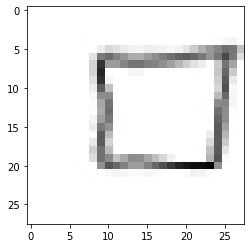

[0.29193717 0.48235568 0.22570708]
Viereck
(28, 28, 1)


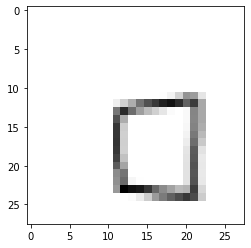

[0.2545769  0.55581486 0.18960828]
Viereck
(28, 28, 1)


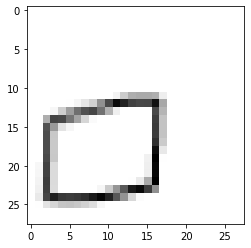

[0.20839977 0.592269   0.19933122]
Viereck
(28, 28, 1)


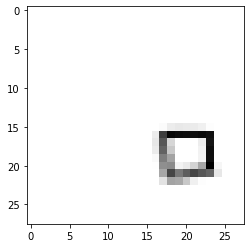

[0.1957567  0.36438254 0.43986073]
Dreieck
(28, 28, 1)


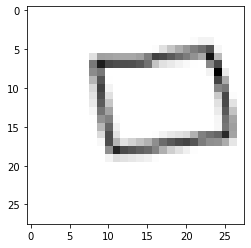

[0.18700004 0.6997276  0.1132723 ]
Viereck
(28, 28, 1)


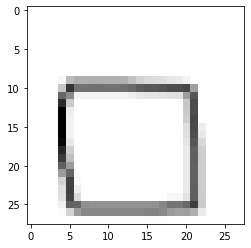

[0.20035926 0.43543887 0.36420187]
Viereck
(28, 28, 1)


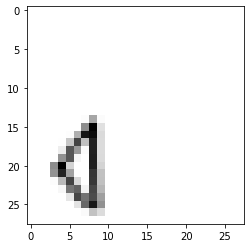

[0.2256187 0.1670116 0.6073697]
Dreieck
(28, 28, 1)


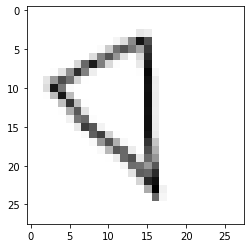

[0.1552164  0.1306841  0.71409947]
Dreieck
(28, 28, 1)


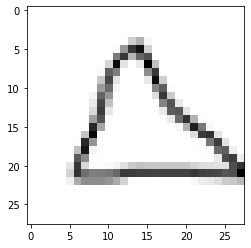

[0.08428597 0.16676828 0.7489458 ]
Dreieck
(28, 28, 1)


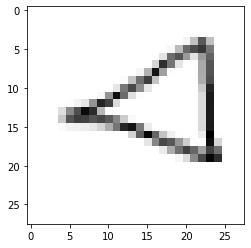

[0.04206831 0.04859243 0.90933925]
Dreieck
(28, 28, 1)


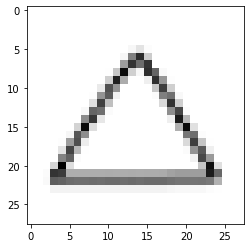

[0.16317496 0.08880188 0.7480231 ]
Dreieck
(28, 28, 1)


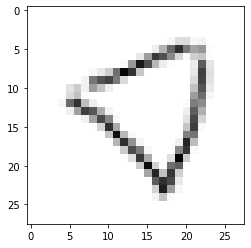

[0.19651374 0.5545413  0.24894497]
Viereck
(28, 28, 1)


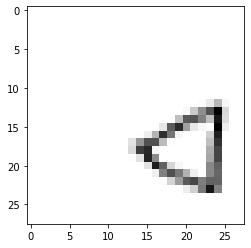

[0.03707825 0.02519344 0.9377283 ]
Dreieck
(28, 28, 1)


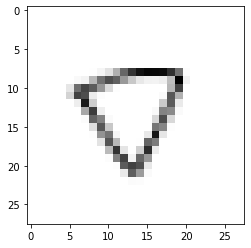

[0.13470535 0.11519186 0.75010276]
Dreieck
(28, 28, 1)


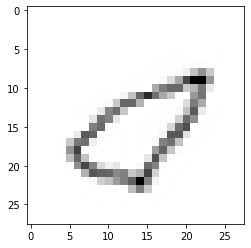

[0.10326783 0.10442036 0.79231185]
Dreieck
(28, 28, 1)


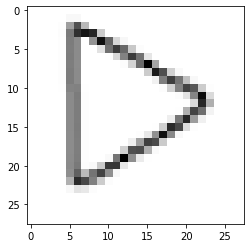

In [ ]:
# Laden des Neuronalen Netzes
model.load_weights(checkpoint_path)

# Vorhersage des Bildes
image_index = 0
number_of_images = 30
test_generator = ImageDataGenerator(rescale = 1./ 255)
test_images = data_generation.flow_from_directory( './shapes/big/test',
                                                    target_size = (image_size,image_size),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'grayscale',
                                                    shuffle= False
                                                    )

all_predictions = model.predict(test_images)

# Anzeige der vorhergesagten Bilder
x,y = test_images.next()

for i in range(image_index ,image_index+number_of_images):
    one_pred = all_predictions[i]
    print(one_pred)

    predicition_name = np.argmax(one_pred)
    if predicition_name == 0:
        print("Kreis") 
    if predicition_name == 1:
        print("Viereck")
    if predicition_name == 2:
        print("Dreieck")

    image = x[i]
    print(image.shape)
    plt.imshow(image.reshape(28,28), cmap = "gray")
    plt.show()

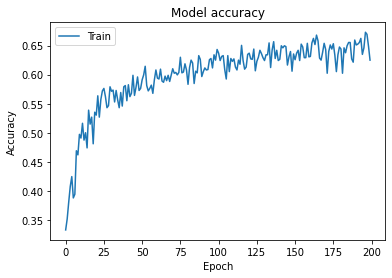

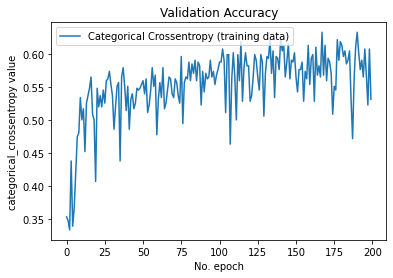

In [ ]:
# Plotten der Genauigkeit (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['val_accuracy'], label='Categorical Crossentropy (training data)')
plt.title('Validation Accuracy')
plt.ylabel('categorical_crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

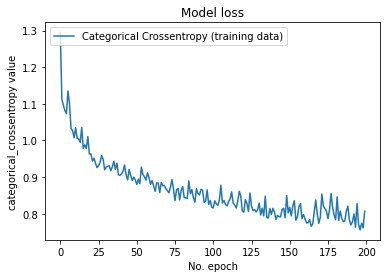

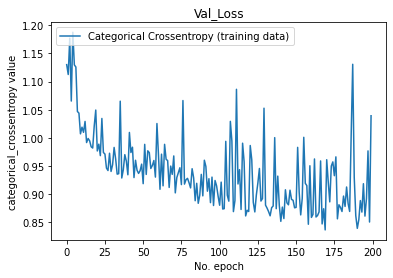

In [ ]:
# Plotten der Loss-Funktion
plt.plot(history.history['loss'], label='Categorical Crossentropy (training data)')
plt.title('Model loss')
plt.ylabel('categorical_crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['val_loss'], label='Categorical Crossentropy (training data)')
plt.title('Val_Loss')
plt.ylabel('categorical_crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Quelle: https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3


---
# Aufgaben

## 1.   Vorhersage von anderen Bildern




Das Neuronale Netz kann nicht nur Kreise, sondern auch Dreicke und Vierecke erkennen lassen. Dafür änderst du einfach im 5. Schritt den Pfad 

> `image_path = 'shapes/test/circles/drawing(94).png'`

beispielsweise für ein Dreieck in

> `image_path = 'shapes/test/triangles/drawing(12).png'`

und beispielsweise für ein Viereck in 

> `image_path = 'shapes/test/squares/drawing(85).png'`




In [ ]:
# Angabe des Verzeichnisses, in dem sich die Bilder zum Training befinden
image_main_directory = "./shapes/train/"

# Erstellung eines Datensets aus Bildern und Labeln
(image_set, label_set) = CreateMyDataset(image_main_directory, image_size, num_classes)

In [ ]:
# Kontrolle: Ausgabe der Dimension des Image-Sets und des Label-Sets
print("Dimension des Image-Sets: \n(Anzahl Bilder, Anzahl Eingabeneuronen) = " + str(image_set.shape))
print("Dimension des Label-Sets: \n(Anzahl Bilder, Anzahl möglicher Labels) = " +str(label_set.shape))

Dimension des Image-Sets: 
(Anzahl Bilder, Anzahl Eingabeneuronen) = (210, 784)
Dimension des Label-Sets: 
(Anzahl Bilder, Anzahl möglicher Labels) = (210, 3)


## 2.   Variation des Trainings



Die Fähigkeit des Neuronalen Netzes wird durch das Training beeinflusst. Die Länge des Trainings wird mit der Anzahl der Epochen angegeben. Nach einer Epoche ist jedes Bild des Datensets einmal durch das Neuronale Netz gelaufen.

Um das Training zu verlängern oder zu verkürzen, gib im 4. Schritt einen anderen Wert für 

> `epochs = 20`

ein.

Um das Training zu verlängern, könntest du beispielsweise

> `epochs = 40`

testen. 

Um das Training zu verkürzen, könntest du beispielsweise

> `epochs = 10` 

testen. 

Wie verändern sich die vorhergesagten Werte für ein Bild dadurch im 5. Schritt? Wie verändern sich die Grafiken?


## 3. Veränderung des Netzaufbaus

Das Neuronale Netz ist aktuell aus einer Eingabeschicht mit 784 Neuronen, einer Ausgabeschicht mit 3 Neuronen und einer mittleren Schicht (Hidden Layer) mit 32 Neuronen aufgebaut. Das erkennst du im 2. Schritt unter:

Schritt 2: Aufbau des Neuronalen Netzes

> `model.add(Dense(units=32, activation='relu', input_shape=(image_size*image_size,)))`

> `model.add(Dense(units=num_classes, activation='sigmoid'))`


Ändere die Anzahl der Neuronen der mittleren Schicht. Mit beispielsweise

> `units = 16 `

kannst du sie verringern. 

Mit beispielsweise

> `units = 64 `

kannst du sie vergrößern. 

Wie wirkt sich diese Veränderung auf die Vorhersage aus? 